<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1d8lmQCL40i0rGj_qMFjj5dUXdQYR_ixe" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

---

# **Licencia**

**Autor**: Juan Francisco Puentes Calvo

**Licencia**: GPL v3 (https://www.gnu.org/licenses/gpl-3.0.html)


# **Reconocimientos**

* Ninguno, por ahora.

---

## Detección de caras (GPU)

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

I0000 00:00:1761433113.449852   11316 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1761433113.452768   14634 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.1), renderer: Mesa Intel(R) UHD Graphics 620 (KBL GT2)
W0000 00:00:1761433113.457930   14628 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1761433113.471010   14624 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


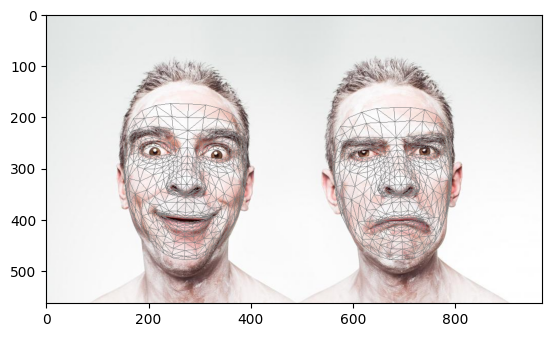

In [10]:
# prompt: Dada una imagen referenciada mediante una url, muestra los landmarks de las caras que aparezcan en ellas.

import numpy as np
# Instalar las librerías necesarias
!pip install -q mediapipe opencv-python

# Importar las librerías
import cv2
import mediapipe as mp
import urllib.request

#from google.colab.patches import cv2_imshow

# Inicializar el detector de caras
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2)
'''
# Definir la URL de la imagen
url = 'https://raw.github.com/FranPuentes/iTI2025/main/data/two-men-faces-and-white-powder.jpg'

# Leer la imagen desde la URL
with urllib.request.urlopen(url) as response:
  image = response.read()

# Convertir la imagen a un array NumPy
image = cv2.imdecode(np.frombuffer(image, np.uint8), -1)
'''
image = cv2.imread('data/two-men-faces-and-white-powder.jpg')

# Detectar los landmarks de las caras
results = face_mesh.process(image)

# Dibujar los landmarks en la imagen
if results.multi_face_landmarks:
  for face_landmarks in results.multi_face_landmarks:
    mp.solutions.drawing_utils.draw_landmarks(
        image=image,
        landmark_list=face_landmarks,
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles.get_default_face_mesh_tesselation_style())

# Mostrar la imagen con los landmarks
# cv2_imshow(image)
%matplotlib inline
from matplotlib import pyplot as plt
# Matplot lib expects img in RGB format but OpenCV provides it in BGR.
im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()


In [11]:
# prompt: A partir de los landmarks detectados, genera un vector para cada cara detectada.

# Crear una lista para almacenar los vectores de las caras
face_vectors = []

# Iterar sobre los landmarks de las caras
if results.multi_face_landmarks:
  for face_landmarks in results.multi_face_landmarks:
    # Crear un vector para la cara actual
    face_vector = []
    # Iterar sobre los landmarks de la cara actual
    for landmark in face_landmarks.landmark:
      # Añadir las coordenadas x, y, z del landmark al vector
      face_vector.extend([landmark.x, landmark.y, landmark.z])
    # Añadir el vector de la cara a la lista de vectores de caras
    face_vectors.append(face_vector)

# Imprimir los vectores de las caras
print(face_vectors)


[[0.7163442969322205, 0.6859362721443176, -0.032963890582323074, 0.7164095044136047, 0.6129652261734009, -0.06306061893701553, 0.7147247195243835, 0.6339792609214783, -0.03351956605911255, 0.7023913860321045, 0.5410711169242859, -0.04756733030080795, 0.7158675193786621, 0.5908877849578857, -0.06679486483335495, 0.7142409086227417, 0.5613986253738403, -0.061972476541996, 0.709488034248352, 0.49150002002716064, -0.031041182577610016, 0.6251779794692993, 0.4924721121788025, 0.012007394805550575, 0.7066933512687683, 0.45329099893569946, -0.023408813402056694, 0.7057960629463196, 0.42867422103881836, -0.02568545937538147, 0.701586902141571, 0.3233760595321655, -0.010332070291042328, 0.7165273427963257, 0.6969907283782959, -0.031332455575466156, 0.7164313197135925, 0.705524742603302, -0.027463270351290703, 0.7161366939544678, 0.7088522911071777, -0.022393429651856422, 0.7162487506866455, 0.7170054912567139, -0.019945483654737473, 0.7167901992797852, 0.7264615297317505, -0.02203715220093727, 

In [12]:
# prompt: ¿Cuantos componentes poseen los vectores?

# Imprimir el número de componentes de los vectores de las caras
for i, face_vector in enumerate(face_vectors):
  print("La cara {} tiene {} componentes.".format(i+1, len(face_vector)))


La cara 1 tiene 1404 componentes.
La cara 2 tiene 1404 componentes.


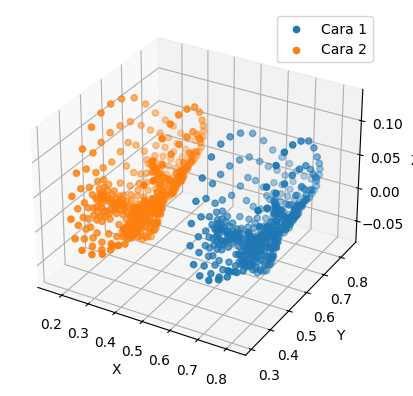

In [13]:
# prompt: Representa ambos vectores en 3d de forma que se vean sus diferencias

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura y un eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Iterar sobre los vectores de las caras y representarlos en 3D
for i, face_vector in enumerate(face_vectors):
  # Extraer las coordenadas x, y, z del vector
  x = face_vector[0::3]
  y = face_vector[1::3]
  z = face_vector[2::3]

  # Representar los puntos en 3D
  ax.scatter(x, y, z, label=f'Cara {i+1}')

# Configurar los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Añadir una leyenda
ax.legend()

# Mostrar la gráfica
plt.show()


In [14]:
# prompt: Calcula la distancia del coseno de ambas caras y su similitud.

from scipy.spatial.distance import cosine

# Calcula la distancia del coseno entre los vectores de las dos caras
cosine_distance = cosine(face_vectors[0], face_vectors[1])

# Imprime la distancia del coseno
print("Distancia del coseno:", cosine_distance)


Distancia del coseno: 0.08922800647039031


In [1]:
# prompt: Carga un dataset de un fichero csv referenciado por una url. Muestra las primeras filas y un resumen de su contenido.

import pandas as pd

# URL del archivo CSV
url = 'https://raw.github.com/FranPuentes/iTI2025/main/data/dataset-expresiones.csv'

# Cargar el dataset desde la URL
df = pd.read_csv(url)

# Mostrar las primeras filas del dataset
print(df.head())

# Mostrar un resumen del contenido del dataset
print(df.info())


   _neutral  browDownLeft  browDownRight  browInnerUp  browOuterUpLeft  \
0  0.000003      0.034882       0.022020     0.004130         0.154251   
1  0.000002      0.035118       0.025522     0.002311         0.157234   
2  0.000003      0.023071       0.017342     0.004608         0.191929   
3  0.000003      0.020419       0.023190     0.007747         0.195720   
4  0.000003      0.020183       0.017608     0.010782         0.187050   

   browOuterUpRight  cheekPuff  cheekSquintLeft  cheekSquintRight  \
0          0.081338   0.000017     2.356467e-07      6.498406e-07   
1          0.069117   0.000014     1.390427e-07      4.644600e-07   
2          0.080651   0.000015     1.732419e-07      5.160118e-07   
3          0.063790   0.000015     1.697698e-07      4.930337e-07   
4          0.073699   0.000014     2.274220e-07      5.557735e-07   

   eyeBlinkLeft  ...  mouthShrugUpper  mouthSmileLeft  mouthSmileRight  \
0      0.182193  ...         0.042678        0.000148         0.00

In [2]:
# prompt: Usando un algoritmo de clustering, lleva a cabo un agrupamiento de todas las filas y todas las columnas, excepto aquella llamada "__TARGET__". Esta sepárala para luego usarla como criterior color a la hora de representar los clusters. El número de clusters en en número de etiquetas diferentes que tiene la columna "__TARGET__". No hagas ninguna representación de los datos.

from sklearn.cluster import KMeans

# Eliminar la columna "__TARGET__" y almacenarla en una variable separada
target = df['__TARGET__']
df_sin_target = df.drop('__TARGET__', axis=1)

# Obtener el número de clusters a partir del número de etiquetas únicas en la columna "__TARGET__"
n_clusters = target.nunique()

# Crear un modelo de clustering KMeans con el número de clusters especificado
kmeans = KMeans(n_clusters=n_clusters)

# Ajustar el modelo a los datos sin la columna "__TARGET__"
kmeans.fit(df_sin_target)

# Obtener las etiquetas de los clusters asignadas a cada fila
labels = kmeans.labels_

# No se realiza ninguna representación de los datos según la solicitud.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


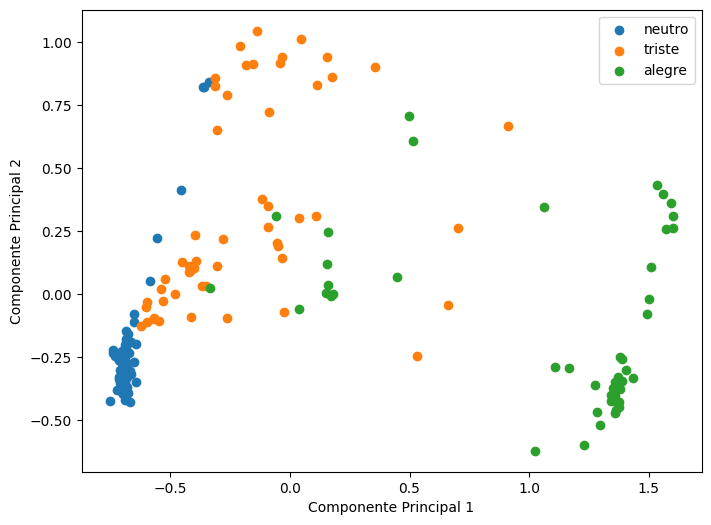

In [6]:
# prompt: Usando el modelo entrenado en la cenla anterior, crea una representación en 2d de los datos, coloreando cada punto con la columna __TARGET__, esta columna contiene tres tipos de expresiones de rostros, neutro, triste y alegra.

import matplotlib.pyplot as plt
# Importar la librería necesaria para la reducción de dimensionalidad
from sklearn.decomposition import PCA

# Crear un objeto PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)

# Ajustar el PCA a los datos sin la columna "__TARGET__"
pca.fit(df_sin_target)

# Transformar los datos a 2 dimensiones
data_2d = pca.transform(df_sin_target)

# Crear una figura y un eje
plt.figure(figsize=(8, 6))

# Iterar sobre las etiquetas únicas en la columna "__TARGET__"
for label in target.unique():
    # Seleccionar los puntos de datos correspondientes a la etiqueta actual
    indices = target == label
    # Representar los puntos de datos en 2D con el color correspondiente a la etiqueta
    plt.scatter(data_2d[indices, 0], data_2d[indices, 1], label=label)

# Añadir una leyenda
plt.legend()

# Configurar los títulos de los ejes
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Mostrar la gráfica
plt.show()


In [14]:
# prompt: Cuanta información se ha perdido o retenido a hacer la reducción de dimensionalidad.

# Calcula la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Calcula la varianza total explicada por los dos componentes principales
total_explained_variance = explained_variance.sum()

# Imprime la varianza total explicada
print("La varianza total explicada por los dos componentes principales es:", total_explained_variance)

# Calcula la varianza perdida
lost_variance = 1 - total_explained_variance

# Imprime la varianza perdida
print("La varianza perdida al reducir la dimensionalidad es:", lost_variance)


La varianza total explicada por los dos componentes principales es: 0.8372113961097569
La varianza perdida al reducir la dimensionalidad es: 0.16278860389024308


In [19]:
# prompt: ¿Si si fuese a 3d, cuanta información se habría retenido?

# Crear un objeto PCA para reducir la dimensionalidad a 3 componentes
pca_3d = PCA(n_components=3)

# Ajustar el PCA a los datos sin la columna "__TARGET__"
pca_3d.fit(df_sin_target)

# Calcula la varianza explicada por cada componente principal
explained_variance_3d = pca_3d.explained_variance_ratio_

# Calcula la varianza total explicada por los tres componentes principales
total_explained_variance_3d = explained_variance_3d.sum()

# Imprime la varianza total explicada
print("La varianza total explicada por los tres componentes principales es:", total_explained_variance_3d)

# Calcula la varianza perdida
lost_variance_3d = 1 - total_explained_variance_3d

# Imprime la varianza perdida
print("La varianza perdida al reducir la dimensionalidad a 3D es:", lost_variance_3d)


La varianza total explicada por los tres componentes principales es: 0.8902475269583504
La varianza perdida al reducir la dimensionalidad a 3D es: 0.10975247304164959


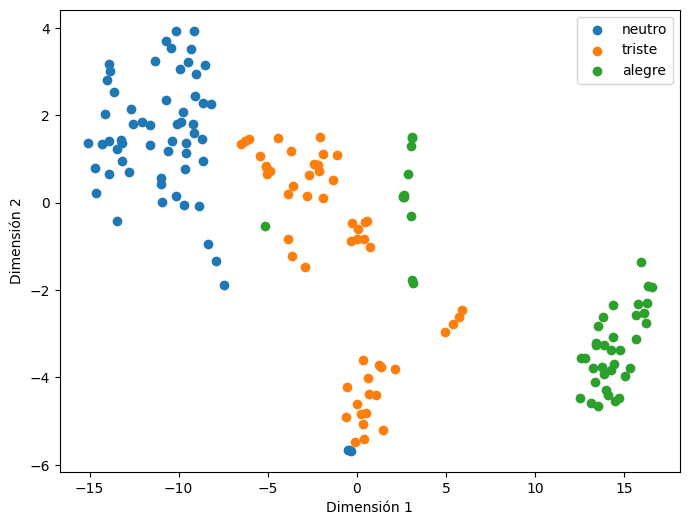

In [7]:
# prompt: Repite la celda anterior, pero usa el algoritmo TSNE

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Crear un objeto TSNE para reducir la dimensionalidad a 2 componentes
tsne = TSNE(n_components=2)

# Ajustar el TSNE a los datos sin la columna "__TARGET__"
data_2d = tsne.fit_transform(df_sin_target)

# Crear una figura y un eje
plt.figure(figsize=(8, 6))

# Iterar sobre las etiquetas únicas en la columna "__TARGET__"
for label in target.unique():
    # Seleccionar los puntos de datos correspondientes a la etiqueta actual
    indices = target == label
    # Representar los puntos de datos en 2D con el color correspondiente a la etiqueta
    plt.scatter(data_2d[indices, 0], data_2d[indices, 1], label=label)

# Añadir una leyenda
plt.legend()

# Configurar los títulos de los ejes
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

# Mostrar la gráfica
plt.show()


In [13]:
# prompt: Cuanta información se ha perdido o retenido a hacer la reducción de dimensionalidad.

# Calcular la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza total explicada por los dos componentes principales
total_variance = explained_variance.sum()

# Imprimir la varianza total explicada
print("La varianza total explicada por los dos componentes principales es:", total_variance)

# Calcular la información perdida
lost_information = 1 - total_variance

# Imprimir la información perdida
print("La información perdida al reducir la dimensionalidad a dos componentes es:", lost_information)


La varianza total explicada por los dos componentes principales es: 0.8372113961097569
La información perdida al reducir la dimensionalidad a dos componentes es: 0.16278860389024308


In [16]:
!pip -q install plotly

In [17]:
import plotly.express as px
from sklearn.manifold import TSNE

# Crear un objeto TSNE para reducir la dimensionalidad a 3 componentes
tsne = TSNE(n_components=3)

# Ajustar el TSNE a los datos sin la columna "__TARGET__"
data_3d = tsne.fit_transform(df_sin_target)

# Crear un DataFrame con los datos en 3D y las etiquetas
df_3d = pd.DataFrame(data_3d, columns=['Dimensión 1', 'Dimensión 2', 'Dimensión 3'])
df_3d['__TARGET__'] = target

# Crear una gráfica 3D interactiva con plotly
fig = px.scatter_3d(df_3d, x='Dimensión 1', y='Dimensión 2', z='Dimensión 3', color='__TARGET__')
fig.show()